In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic "climate" data
 
# For reproducibility
rng = np.random.default_rng(seed=42) 

# We want 1000 samples
n_samples = 1000
temperature = rng.normal(loc=15, scale=10, size=n_samples)  # Mean 15°C, std 10°C
humidity = rng.normal(loc=75, scale=15, size=n_samples)     # Mean 75%, std 15%
# Introduce correlation: precipitation is a function of humidity plus some noise
precipitation = 0.5 * humidity + rng.normal(loc=0, scale=10, size=n_samples)  # Correlated with humidity
wind_speed = rng.normal(loc=10, scale=5, size=n_samples)    # Mean 10m/s, std 5m/s
# Introduce correlation: solar radiation is a function of temperature plus some noise
solar_radiation = 0.8 * temperature + rng.normal(loc=0, scale=5, size=n_samples)  # Correlated with temperature

# Combine into a DataFrame
climate_data = pd.DataFrame({
    'Temperature (°C)': temperature,
    'Humidity (%)': humidity,
    'Precipitation (mm)': precipitation,
    'Wind Speed (m/s)': wind_speed,
    'Solar Radiation (W/m2)': solar_radiation
})
climate_data.head()

,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (m/s),Solar Radiation (W/m2)
0,18.047171,74.110760,32.535870,16.245113,15.703759
1,4.600159,64.060696,25.371571,13.438461,8.156219
2,22.504512,68.782904,38.731550,19.830637,19.370216
3,24.405647,84.508656,44.772872,2.260836,30.718676
4,-4.510352,75.044899,23.474534,8.673199,3.540656


In [3]:
# Now, let's calculate a *correlation matrix*
correlation_matrix = climate_data.corr()

# Finally, let us display the correlation matrix with a color gradient
correlation_matrix.style.background_gradient(cmap='coolwarm')

,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (m/s),Solar Radiation (W/m2)
Temperature (°C),1.000000,-0.007894,0.019758,0.007777,0.844700
Humidity (%),-0.007894,1.000000,0.585828,-0.020930,-0.007003
Precipitation (mm),0.019758,0.585828,1.000000,0.019476,0.032101
Wind Speed (m/s),0.007777,-0.020930,0.019476,1.000000,0.009122
Solar Radiation (W/m2),0.844700,-0.007003,0.032101,0.009122,1.000000


Which feature(s) might we remove given these correlations?

We should remove solar radiation data or temperature, since they are highly correlated. We should also remove either precipitation or humidity since they are highly correlated.

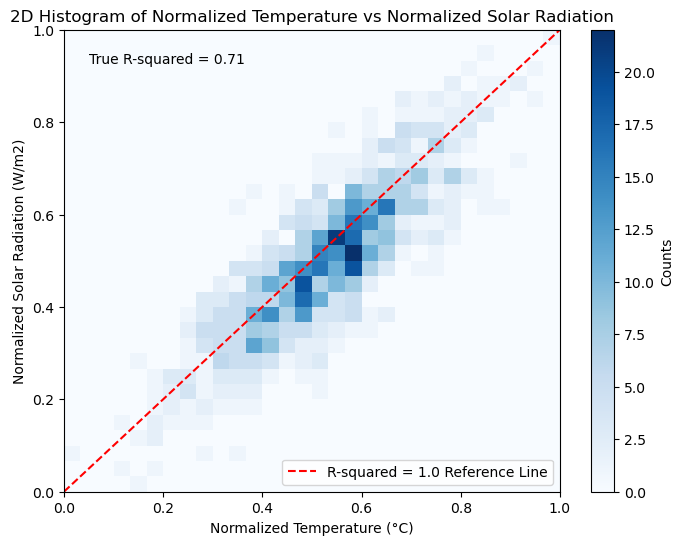

In [14]:
# Here, plot a pair of highly correlated variables (NOT the same variable).
plt.figure(figsize=(8, 6))

# Normalize data for better visualization
norm_temp = (climate_data['Temperature (°C)'] - climate_data['Temperature (°C)'].min()) / (climate_data['Temperature (°C)'].max() - climate_data['Temperature (°C)'].min())
norm_solar = (climate_data['Solar Radiation (W/m2)'] - climate_data['Solar Radiation (W/m2)'].min()) / (climate_data['Solar Radiation (W/m2)'].max() - climate_data['Solar Radiation (W/m2)'].min())

plt.hist2d(norm_temp, norm_solar, bins=30, cmap='Blues')
plt.xlabel('Normalized Temperature (°C)')
plt.ylabel('Normalized Solar Radiation (W/m2)')
plt.title('2D Histogram of Normalized Temperature vs Normalized Solar Radiation')
plt.colorbar(label='Counts')

# Plot a 1:1 linear reference line
min_val = min(norm_temp.min(), norm_solar.min())
max_val = max(norm_temp.max(), norm_solar.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='R-squared = 1.0 Reference Line')

# Calculate true r-squared value and display in legend
r_squared = correlation_matrix.loc['Temperature (°C)', 'Solar Radiation (W/m2)'] ** 2
plt.text(0.05, 0.95, f'True R-squared = {r_squared:.2f}', transform=plt.gca().transAxes, verticalalignment='top')
plt.legend()

plt.show()